In [1]:
import pandas as pd

df = pd.read_csv("/Users/markgranatire/Documents/flames-bdc-app/data/files/olympic_womens_dataset.csv")
df.head()
print(df.columns.tolist())

df = df.drop(["Clock", "Home Team Goals", "Away Team Goals", "X Coordinate 2", "Y Coordinate 2"], axis=1)
df['game_date'] = pd.to_datetime(df['game_date'])
df.head()

['game_date', 'Home Team', 'Away Team', 'Period', 'Clock', 'Home Team Skaters', 'Away Team Skaters', 'Home Team Goals', 'Away Team Goals', 'Team', 'Player', 'Event', 'X Coordinate', 'Y Coordinate', 'Detail 1', 'Detail 2', 'Detail 3', 'Detail 4', 'Player 2', 'X Coordinate 2', 'Y Coordinate 2']


,game_date,Home Team,Away Team,Period,Home Team Skaters,Away Team Skaters,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2
0,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Olympic (Women) - Canada,Emily Clark,Faceoff Win,100,42,Backhand,NaN,NaN,NaN,Lyudmila Belyakova
1,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Olympic (Women) - Canada,Meaghan Mikkelson,Puck Recovery,91,67,NaN,NaN,NaN,NaN,NaN
2,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Olympic (Women) - Canada,Meaghan Mikkelson,Dump In/Out,106,81,Retained,NaN,NaN,NaN,NaN
3,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Olympic (Women) - Canada,Meaghan Mikkelson,Zone Entry,106,81,Dumped,NaN,NaN,NaN,Liana Ganeyeva
4,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Olympic (Women) - Canada,Sarah Nurse,Puck Recovery,168,1,NaN,NaN,NaN,NaN,NaN


In [2]:
df['Team'].unique()

array(['Olympic (Women) - Canada',
       'Olympic (Women) - Olympic Athletes from Russia',
       'Olympic (Women) - Finland', 'Olympic (Women) - United States',
       'St. Lawrence Saints', 'Clarkson Golden Knights'], dtype=object)

In [3]:
df = df.drop(df[df["Team"].isin(["St. Lawrence Saints", "Clarkson Golden Knights"])].index)
df['Team'].unique()

array(['Olympic (Women) - Canada',
       'Olympic (Women) - Olympic Athletes from Russia',
       'Olympic (Women) - Finland', 'Olympic (Women) - United States'],
      dtype=object)

In [4]:
df["Team"] = df["Team"].replace({
    "Olympic (Women) - Canada": "Canada",
    "Olympic (Women) - Olympic Athletes from Russia": "Russia",
    "Olympic (Women) - Finland": "Finland",
    "Olympic (Women) - United States": "USA"
})
df['Team'].unique()

array(['Canada', 'Russia', 'Finland', 'USA'], dtype=object)

In [5]:
shots_df = df[df["Event"].str.contains("Shot")]
shots_counts = shots_df.groupby(["Team"]).size().reset_index(name="Count")

shots_counts

,Team,Count
0,Canada,689
1,Finland,132
2,Russia,59
3,USA,501


In [19]:
df['game_date'].unique()

<DatetimeArray>
['2018-02-11 00:00:00', '2018-02-13 00:00:00', '2018-02-14 00:00:00',
 '2018-02-19 00:00:00', '2018-02-21 00:00:00', '2019-02-12 00:00:00',
 '2019-02-14 00:00:00', '2019-02-17 00:00:00', '2019-04-06 00:00:00',
 '2019-04-13 00:00:00', '2019-04-14 00:00:00']
Length: 11, dtype: datetime64[ns]

In [30]:
def game_type(game_date):
    dt = game_date
    
    if dt.year == 2018 and dt.month == 2:
        type = "Olympic Games"
    elif dt.year == 2019 and dt.month == 2:
        type = "US vs Canada - Rivalry Games"
    else:
        type = "World Championships"
    return type

In [31]:
df["game_type"] = df["game_date"].apply(game_type)
df.head()

,game_date,Home Team,Away Team,Period,Home Team Skaters,Away Team Skaters,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,game_type
0,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Emily Clark,Faceoff Win,100,42,Backhand,NaN,NaN,NaN,Lyudmila Belyakova,Olympic Games
1,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Meaghan Mikkelson,Puck Recovery,91,67,NaN,NaN,NaN,NaN,NaN,Olympic Games
2,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Meaghan Mikkelson,Dump In/Out,106,81,Retained,NaN,NaN,NaN,NaN,Olympic Games
3,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Meaghan Mikkelson,Zone Entry,106,81,Dumped,NaN,NaN,NaN,Liana Ganeyeva,Olympic Games
4,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Sarah Nurse,Puck Recovery,168,1,NaN,NaN,NaN,NaN,NaN,Olympic Games


In [6]:
shot_df = df[df["Event"].str.contains("Shot")]
shot_df.head()

,game_date,Home Team,Away Team,Period,Home Team Skaters,Away Team Skaters,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2
22,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Marie-Philip Poulin,Shot,154,36,Snapshot,On Net,t,f,NaN
30,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Meghan Agosta,Shot,177,39,Snapshot,On Net,f,t,NaN
36,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,6,5,Canada,Brigette Lacquette,Shot,128,82,Fan,Missed,t,t,NaN
54,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Canada,Laura Fortino,Shot,152,67,Slapshot,On Net,t,f,NaN
57,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Canada,Brianne Jenner,Shot,174,58,Snapshot,On Net,f,f,NaN


In [7]:
def rink_area(x):
    if 0 <= x < 75:
        return "Defensive Zone"
    elif 75 <= x <= 125:
        return "Neutral Zone"
    else: 
        return "Offensive Zone"

In [8]:
shot_df["Zone"] = shot_df.apply(lambda x: rink_area(x["X Coordinate"]), axis = 1)

shot_df.head(20)

/var/folders/mn/zxv9btt5163290xr8yjc8v5h0000gn/T/ipykernel_23218/3992164896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_df["Zone"] = shot_df.apply(lambda x: rink_area(x["X Coordinate"]), axis = 1)


,game_date,Home Team,Away Team,Period,Home Team Skaters,Away Team Skaters,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,Zone
22,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Marie-Philip Poulin,Shot,154,36,Snapshot,On Net,t,f,NaN,Offensive Zone
30,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Meghan Agosta,Shot,177,39,Snapshot,On Net,f,t,NaN,Offensive Zone
36,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,6,5,Canada,Brigette Lacquette,Shot,128,82,Fan,Missed,t,t,NaN,Offensive Zone
54,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Canada,Laura Fortino,Shot,152,67,Slapshot,On Net,t,f,NaN,Offensive Zone
57,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Canada,Brianne Jenner,Shot,174,58,Snapshot,On Net,f,f,NaN,Offensive Zone
66,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Canada,Brigette Lacquette,Shot,159,74,Snapshot,Missed,t,f,NaN,Offensive Zone
85,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Canada,Brigette Lacquette,Shot,136,51,Slapshot,Blocked,t,f,NaN,Offensive Zone
87,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Canada,Brianne Jenner,Shot,165,43,Wristshot,Blocked,t,f,NaN,Offensive Zone
95,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Canada,Rebecca Johnston,Shot,179,21,Snapshot,Blocked,t,f,NaN,Offensive Zone
106,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Jocelyne Larocque,Shot,158,13,Snapshot,On Net,t,f,NaN,Offensive Zone


<Axes: xlabel='Date of Game', ylabel='Count of Shots Per Detail'>

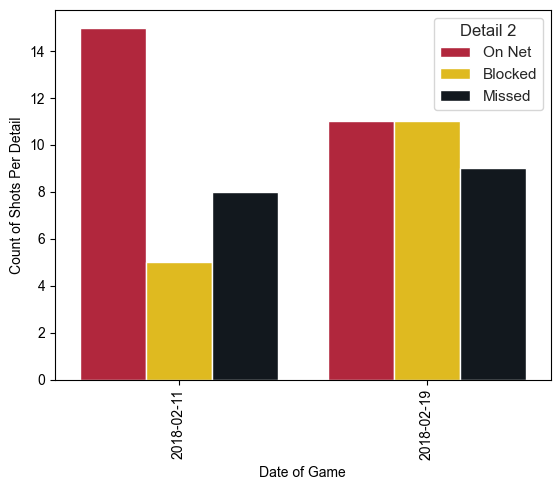

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xticks(rotation=90)
plt.xlabel("Date of Game")
plt.ylabel("Count of Shots Per Detail")
flames_cat = ["#C8102E", "#FFCD00", "#101820", "#7D7D7D"]  # red, gold, black, gray, light gray
sns.set_theme(style="whitegrid")
sns.set_palette(flames_cat)

#plt.figure(figsize=(10, 8))
team_shots_df = shot_df[shot_df["Team"]=="Russia"]
sns.countplot(data=team_shots_df, x="game_date", hue="Detail 2")

In [10]:
shot_df

,game_date,Home Team,Away Team,Period,Home Team Skaters,Away Team Skaters,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,Zone
22,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Marie-Philip Poulin,Shot,154,36,Snapshot,On Net,t,f,NaN,Offensive Zone
30,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Meghan Agosta,Shot,177,39,Snapshot,On Net,f,t,NaN,Offensive Zone
36,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,6,5,Canada,Brigette Lacquette,Shot,128,82,Fan,Missed,t,t,NaN,Offensive Zone
54,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Canada,Laura Fortino,Shot,152,67,Slapshot,On Net,t,f,NaN,Offensive Zone
57,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Canada,Brianne Jenner,Shot,174,58,Snapshot,On Net,f,f,NaN,Offensive Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23950,2019-04-14,Olympic (Women) - Finland,Olympic (Women) - United States,4,5,4,Finland,Ronja Savolainen,Shot,157,16,Wristshot,Blocked,t,f,NaN,Offensive Zone
23965,2019-04-14,Olympic (Women) - Finland,Olympic (Women) - United States,4,4,3,Finland,Minnamari Tuominen,Shot,150,17,Slapshot,On Net,t,t,NaN,Offensive Zone
23979,2019-04-14,Olympic (Women) - Finland,Olympic (Women) - United States,4,4,3,Finland,Petra Nieminen,Shot,166,29,Wristshot,Missed,t,f,NaN,Offensive Zone
23984,2019-04-14,Olympic (Women) - Finland,Olympic (Women) - United States,4,4,3,Finland,Ronja Savolainen,Shot,139,38,Slapshot,Missed,t,t,NaN,Offensive Zone


<Axes: xlabel='Date of Game', ylabel='Count of Shots Per Period'>

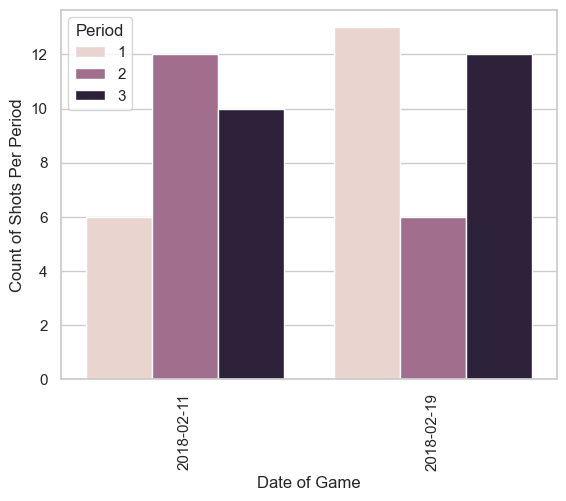

In [11]:
plt.xticks(rotation=90)
plt.xlabel("Date of Game")
plt.ylabel("Count of Shots Per Period")
flames_cat = ["#C8102E", "#FFCD00", "#101820", "#7D7D7D"]  # red, gold, black, gray, light gray
sns.set_theme(style="whitegrid")
sns.set_palette(flames_cat)

team_shots_df = shot_df[shot_df["Team"].str.contains("Russia")]
sns.countplot(data=team_shots_df, x="game_date", hue="Period")

In [12]:
team_shots_df

,game_date,Home Team,Away Team,Period,Home Team Skaters,Away Team Skaters,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,Zone
111,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Valeria Pavlova,Shot,156,40,Wristshot,On Net,t,f,NaN,Offensive Zone
268,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Maria Batalova,Shot,152,52,Wristshot,On Net,f,f,NaN,Offensive Zone
534,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Yekaterina Smolina,Shot,155,4,Wristshot,Blocked,t,f,NaN,Offensive Zone
562,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Valeria Pavlova,Shot,156,14,Wristshot,On Net,f,f,NaN,Offensive Zone
582,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Nina Pirogova,Shot,197,21,Wristshot,On Net,f,f,NaN,Offensive Zone
585,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Olga Sosina,Shot,162,10,Wristshot,Blocked,t,f,NaN,Offensive Zone
615,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,2,5,5,Russia,Lyudmila Belyakova,Shot,138,44,Wristshot,Missed,t,f,NaN,Offensive Zone
663,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,2,5,5,Russia,Valeria Pavlova,Shot,163,34,Wristshot,On Net,t,f,NaN,Offensive Zone
665,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,2,5,5,Russia,Valeria Pavlova,Shot,177,31,Snapshot,Missed,f,f,NaN,Offensive Zone
685,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,2,5,5,Russia,Nina Pirogova,Shot,158,47,Wristshot,Missed,f,f,NaN,Offensive Zone


<Axes: xlabel='Date of Game', ylabel='Count of Shots Per Detail'>

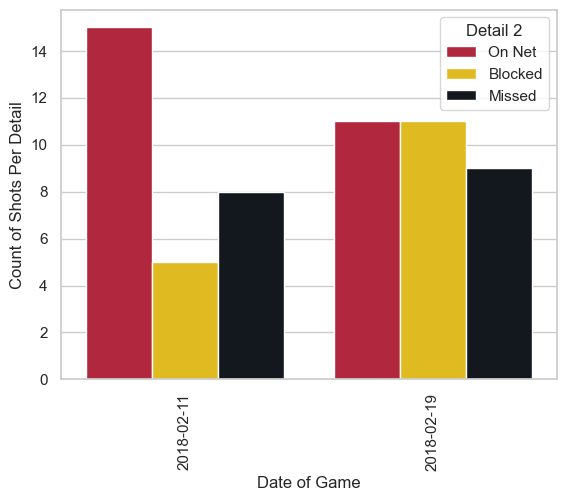

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xticks(rotation=90)
plt.xlabel("Date of Game")
plt.ylabel("Count of Shots Per Detail")
flames_cat = ["#C8102E", "#FFCD00", "#101820", "#7D7D7D", "#C8102E", "#FFCD00"]  # red, gold, black, gray, light gray
sns.set_theme(style="whitegrid")
sns.set_palette(flames_cat)

#plt.figure(figsize=(10, 8))
team_shots_df = shot_df[shot_df["Team"].str.contains("Russia")]
sns.countplot(data=team_shots_df, x="game_date", hue="Detail 2")

In [14]:
team_shots_df

,game_date,Home Team,Away Team,Period,Home Team Skaters,Away Team Skaters,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,Zone
111,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Valeria Pavlova,Shot,156,40,Wristshot,On Net,t,f,NaN,Offensive Zone
268,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Maria Batalova,Shot,152,52,Wristshot,On Net,f,f,NaN,Offensive Zone
534,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Yekaterina Smolina,Shot,155,4,Wristshot,Blocked,t,f,NaN,Offensive Zone
562,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Valeria Pavlova,Shot,156,14,Wristshot,On Net,f,f,NaN,Offensive Zone
582,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Nina Pirogova,Shot,197,21,Wristshot,On Net,f,f,NaN,Offensive Zone
585,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Olga Sosina,Shot,162,10,Wristshot,Blocked,t,f,NaN,Offensive Zone
615,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,2,5,5,Russia,Lyudmila Belyakova,Shot,138,44,Wristshot,Missed,t,f,NaN,Offensive Zone
663,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,2,5,5,Russia,Valeria Pavlova,Shot,163,34,Wristshot,On Net,t,f,NaN,Offensive Zone
665,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,2,5,5,Russia,Valeria Pavlova,Shot,177,31,Snapshot,Missed,f,f,NaN,Offensive Zone
685,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,2,5,5,Russia,Nina Pirogova,Shot,158,47,Wristshot,Missed,f,f,NaN,Offensive Zone


In [15]:
team_shots_counts = team_shots_df.groupby(["Team", "game_date"]).size().reset_index(name="Count")
team_shots_counts

,Team,game_date,Count
0,Russia,2018-02-11,28
1,Russia,2018-02-19,31


In [16]:
import plotly.tools as tls
import plotly.express as px
from plotly.io import to_html

#team_shots_df["Period"] = team_shots_df["Period"].astype("category")
fig = px.bar(team_shots_counts, x="game_date", y="Count", color="game_date", barmode="group", title="Total Shots Per Game")

chart_html = to_html(fig, include_plotlyjs="cdn", full_html=False)

fig

In [17]:
team_shots_counts_detail = team_shots_df.groupby(["Team", "Detail 2"]).size().reset_index(name="Count")
team_shots_counts_detail

,Team,Detail 2,Count
0,Russia,Blocked,16
1,Russia,Missed,17
2,Russia,On Net,26


In [18]:
#fig = px.bar(team_shots_counts, x="game_date", y="Count", color="game_date", barmode="group", title="Total Shots Per Game")
fig = px.pie(team_shots_counts_detail, values='Count', names='Detail 2', title='Shot Details')

chart_html = to_html(fig, include_plotlyjs="cdn", full_html=False)

fig